<a href="https://colab.research.google.com/github/CodeWithAlvin/handson-ml2_practice/blob/main/hands_on_ml_ch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fetching data from internet

In [ ]:
import os
import tarfile
import urllib.request

In [ ]:
DOWNLOAD_URL="https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.tgz?raw=true"
FILE_NAME="housing.tgz"

In [ ]:
def fetch_data(url,file_name):
  urllib.request.urlretrieve(url,file_name)
  tgz_file=tarfile.open(file_name)
  tgz_file.extractall(file_name.split(".")[0])
  tgz_file.close()

In [ ]:
fetch_data(DOWNLOAD_URL,FILE_NAME)

# data visualisation

In [ ]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_data(path):
  return pd.DataFrame(pd.read_csv(path))

In [ ]:
housing=load_data('/content/housing/housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### seeing the ocean_proximity more deeply

In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff38d009320>,
      dtype=object)

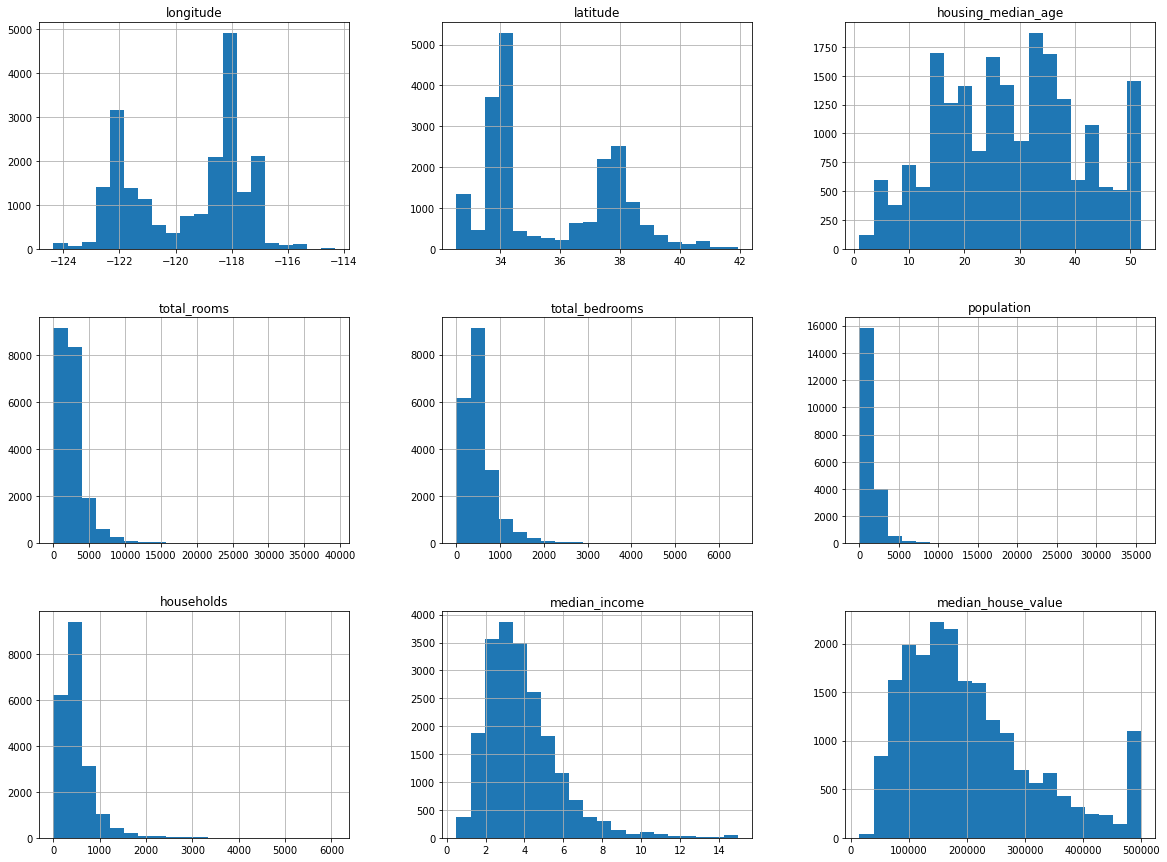

In [78]:
housing.hist(bins=20,figsize=(20,15))
# bins is size of to make class-width
# fig size The size in inches of the figure to create. Uses the value

# doing train test split

#### using statified suffle split as "median_income" is a important feature so it need to be eually distributed

In [69]:
housing["income_cat"]=pd.cut(housing['median_income'],
                             bins=[0,1.5,3.0,4.5,6 ,np.inf],
                             labels=[1,2,3,4,5]
                             )
# making a new feature and what pd.cut do is it takes the 1d array that need to be groupified 
#takes bins as int or a list which defines the the width of each class and 
#label gives them thier names and an array as output

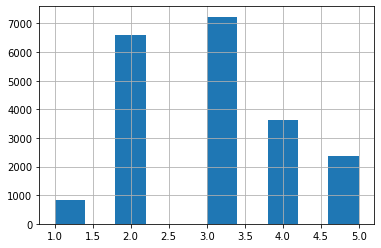

In [70]:
housing['income_cat'].hist()

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

In [79]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)  ##gives an iterator       n_split is no of time it need to resuffle

In [73]:
for train_index,test_index in split.split(housing,housing["income_cat"]):
  train_set=housing.loc[train_index]
  test_set=housing.loc[test_index]

# checking distribution 

In [74]:
test_set['income_cat'].value_counts()/len(test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [75]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

### distribution is equal

## droping extra added income_cat in main data which is not useful now

In [76]:
for set_ in (train_set,test_set):
  set_.drop("income_cat",axis=1,inplace=True)# inplace = true make changes in orignal dataset if false then make a copy